# Package Imports

In [66]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.transform import resize

In [30]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Data Preprocessing

In [48]:
# Define paths
input_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/rawTesting/pituitary"
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary"

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

**Load images**

In [49]:
# Load images from the directory
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)  # Load image
            if image is not None:
                images.append(image)
                filenames.append(filename)
    return images, filenames

images, filenames = load_images_from_directory(input_directory)

**Apply Clahe**

In [50]:
def apply_clahe(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image

**Save Processed Images**

In [51]:
def save_images(images, filenames, output_directory):
    for img, filename in zip(images, filenames):
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, img)  # Save image
        print(f"Saved processed image: {output_path}")

In [52]:
# Process all images
processed_images = []
for image in images:
    processed_image = apply_clahe(image)  # Apply CLAHE
    processed_images.append(processed_image)

# Save processed images
save_images(processed_images, filenames, output_directory)

Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0233.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0227.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0019.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0031.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0025.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0186.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0192.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0179.jpg
Saved processed image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Testing/pituitary/Te-pi_0145.jpg
Saved processed image: /Users/arsalankhan/Docu

# Image Normalization

In [9]:
import os
import cv2
import numpy as np

# Directories
input_directory = "AugValidation"
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/"

# Ensure output directory exists and create subfolders
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for subfolder in os.listdir(input_directory):
    subfolder_path = os.path.join(output_directory, subfolder)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

In [10]:
# Function to normalize images
def normalize_image(image):
    return image / 255.0  # Normalize to range [0, 1]

# Iterate through each subfolder (class folder)
for class_folder in os.listdir(input_directory):
    class_input_path = os.path.join(input_directory, class_folder)
    class_output_path = os.path.join(output_directory, class_folder)

    if os.path.isdir(class_input_path):  # Ensure it's a directory
        for filename in os.listdir(class_input_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for valid formats
                # Load image
                image_path = os.path.join(class_input_path, filename)
                image = cv2.imread(image_path)
                
                # Normalize image
                if image is not None:
                    normalized_image = normalize_image(image)
                    
                    # Save normalized image
                    output_path = os.path.join(class_output_path, filename.replace(".jpg", ".npy").replace(".png", ".npy"))
                    np.save(output_path, normalized_image)
                    print(f"Saved normalized image: {output_path}")

Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_0277.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_1182.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_1425.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_1431.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_1357.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_1380.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/Tr-pi_0920.npy
Saved normalized image: /Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/NormalizedValidation/pituitary/aug_0_7303.npy
Saved normalized image: /Users/arsalankh

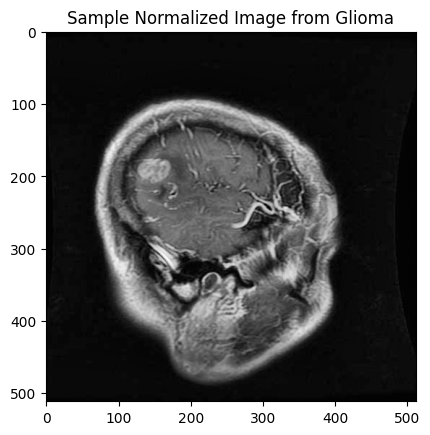

In [6]:
# Reload a sample normalized image
sample_class = "Glioma"  # Change to any class folder
sample_file = os.listdir(os.path.join(output_directory, sample_class))[0]  # Pick the first file
sample_image_path = os.path.join(output_directory, sample_class, sample_file)

# Load the normalized image
sample_image = np.load(sample_image_path)

# Display the image
import matplotlib.pyplot as plt

plt.imshow(sample_image)
plt.title(f"Sample Normalized Image from {sample_class}")
plt.show()

# Balancing Dataset using GAN

In [10]:
import os
# Count the number of files in each subfolder of training and validation
for subfolder_name in os.listdir(input_dir):
    subfolder_path = os.path.join(input_dir, subfolder_name)
    if os.path.isdir(subfolder_path):
        subfolder_file_count = sum(len(files) for _, _, files in os.walk(subfolder_path))
        print(f"Total number of files in subfolder '{subfolder_name}' of training: {subfolder_file_count}")

for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    if os.path.isdir(subfolder_path):
        subfolder_file_count = sum(len(files) for _, _, files in os.walk(subfolder_path))
        print(f"Total number of files in subfolder '{subfolder_name}' of validation: {subfolder_file_count}")
output_folder = '/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Output'
# Count the number of files in each folder
for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)
    if os.path.isdir(folder_path):
        file_count = sum(len(files) for _, _, files in os.walk(folder_path))
        print(f"Total number of files in folder '{folder_name}': {file_count}")
file_count = sum(len(files) for _, _, files in os.walk(output_folder))

print(f"Total number of files in the output folder: {file_count}")

Total number of files in subfolder 'pituitary' of training: 1165
Total number of files in subfolder 'notumor' of training: 1276
Total number of files in subfolder 'glioma' of training: 1056
Total number of files in subfolder 'meningioma' of training: 1071
Total number of files in subfolder 'pituitary' of validation: 292
Total number of files in subfolder 'notumor' of validation: 319
Total number of files in subfolder 'glioma' of validation: 265
Total number of files in subfolder 'meningioma' of validation: 268
Total number of files in folder 'Training': 4569
Total number of files in folder 'Validation': 1145
Total number of files in the output folder: 5715


In [3]:
#### AUGUMENTATION

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths
base_dir = "Output/Validation"  # Directory containing subfolders
output_dir = "AugValidation"         # Directory for saving augmented images

# Target counts for each folder
TARGET_COUNTS = {
    "glioma": 319,        # No augmentation needed
    "meningioma": 319,     # Augment to reach 574 images
    "pituitary": 319,
    "notumor": 319     # Augment to reach 1140 images
}

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Function to augment images to the target count
def augment_images_to_target(input_dir, output_dir, target_count):
    class_name = os.path.basename(input_dir)
    output_class_dir = os.path.join(output_dir, class_name)

    # Ensure output subfolder exists
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    # Copy existing images to the output directory
    current_images = [img for img in os.listdir(input_dir) if img.endswith((".png", ".jpg", ".jpeg"))]
    for img_name in current_images:
        src_path = os.path.join(input_dir, img_name)
        dest_path = os.path.join(output_class_dir, img_name)
        if not os.path.exists(dest_path):  # Avoid overwriting
            os.system(f'cp "{src_path}" "{dest_path}"')

    # Update the count of existing images
    current_count = len(os.listdir(output_class_dir))
    deficit = target_count - current_count

    if deficit <= 0:
        print(f"No augmentation needed for {class_name}. Current count: {current_count}")
        return

    print(f"Augmenting {class_name} with {deficit} images...")

    # Augment images
    augmented_count = 0
    while augmented_count < deficit:
        for img_name in current_images:
            if augmented_count >= deficit:
                break

            img_path = os.path.join(input_dir, img_name)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_class_dir,
                                      save_prefix="aug", save_format="png"):
                augmented_count += 1
                if augmented_count >= deficit:
                    break

    print(f"Augmentation for {class_name} complete. Total images: {len(os.listdir(output_class_dir))}")

# Main process
# Augment each class folder based on the target counts
for folder_name, target_count in TARGET_COUNTS.items():
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.exists(folder_path):
        augment_images_to_target(folder_path, output_dir, target_count)
    else:
        print(f"Folder not found: {folder_name}")

print("Data augmentation process complete!")



Augmenting glioma with 54 images...
Augmentation for glioma complete. Total images: 319
Augmenting meningioma with 51 images...
Augmentation for meningioma complete. Total images: 319
Augmenting pituitary with 27 images...
Augmentation for pituitary complete. Total images: 319
No augmentation needed for notumor. Current count: 319
Data augmentation process complete!


# Data Splitting

In [28]:
import os
import random
import shutil

def split_dataset(data_dir, output_dir, split_ratio=0.8):
    """
    Splits a dataset into training and validation sets while maintaining class distribution.

    Args:
    - data_dir (str): Path to the original dataset directory.
    - output_dir (str): Path to the output directory.
    - split_ratio (float): Proportion of data to keep in the training set.

    Directories Created:
    - output_dir/Training
    - output_dir/Validation
    """
    # Create output directories
    train_dir = os.path.join(output_dir, "Training")
    val_dir = os.path.join(output_dir, "Validation")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Iterate over each class
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            # Get all files in the class directory
            files = os.listdir(class_path)
            random.shuffle(files)

            # Calculate split index
            split_idx = int(len(files) * split_ratio)

            # Define class-specific train/val directories
            train_class_dir = os.path.join(train_dir, class_name)
            val_class_dir = os.path.join(val_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(val_class_dir, exist_ok=True)

            # Copy files to respective directories
            for file in files[:split_idx]:
                shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
            for file in files[split_idx:]:
                shutil.copy(os.path.join(class_path, file), os.path.join(val_class_dir, file))

            print(f"Class '{class_name}': {split_idx} training files, {len(files) - split_idx} validation files")

# Example usage
output_directory = "/Users/arsalankhan/Documents/RESEARCH/BRAIN TUMOR/Output"
split_dataset(data_directory, output_directory, split_ratio=0.8)

Class 'pituitary': 1165 training files, 292 validation files
Class 'notumor': 1276 training files, 319 validation files
Class 'glioma': 1056 training files, 265 validation files
Class 'meningioma': 1071 training files, 268 validation files


In [19]:
import cv2
import os

# Directory containing the images
image_dir = "AugTraining/glioma"

# Iterate through each image file
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Check the shape of the image
        if image is not None:
            print(f"Image shape: {image.shape}")

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
I

# Brain Tumor Feature Extraction and PCA and Model Training

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the directories
train_dir = "AugTraining"
val_dir = "Validation"
test_dir = "Testing"

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

# Visualize the distribution of tumor types in the training dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))
train_df = pd.concat(train_data, ignore_index=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    try:
        img = plt.imread(image_path)
        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis("off")
    except:
        continue
plt.tight_layout()
plt.show()

# Set the image size
image_size = (150, 150)

# Set the batch size and number of epochs
batch_size = 32
epochs = 50

# Set the learning rate
learning_rate = 0.001

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model with a specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Calculate steps dynamically
steps_per_epoch = np.ceil(train_generator.samples / batch_size).astype(int)
validation_steps = np.ceil(validation_generator.samples / batch_size).astype(int)
test_steps = np.ceil(test_generator.samples / batch_size).astype(int)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 1. Enhanced Model with EfficientNetV2L and advanced techniques
def create_enhanced_model(image_size, num_classes):
    base_model = EfficientNetV2L(
        weights='imagenet',
        include_top=False,
        input_shape=(image_size[0], image_size[1], 3)
    )
    
    # Progressive layer unfreezing
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization(momentum=0.9)(x)
    
    # Wider architecture with residual connections
    x1 = Dense(2048, activation='swish')(x)  # Using swish activation
    x1 = Dropout(0.5)(x1)
    x1 = BatchNormalization(momentum=0.9)(x1)
    
    x2 = Dense(1024, activation='swish')(x1)
    x2 = Dropout(0.4)(x2)
    x2 = BatchNormalization(momentum=0.9)(x2)
    
    # Residual connection
    x = tf.keras.layers.Concatenate()([x2, x1])
    
    x = Dense(512, activation='swish')(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization(momentum=0.9)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=outputs)
    return model, base_model

# 2. Enhanced Data Augmentation specific to medical imaging
def get_data_generators(train_dir, val_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,  # Reduced rotation for medical images
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True,
        vertical_flip=False,  # Medical images often have specific orientation
        fill_mode='constant',  # Better for medical images
        brightness_range=[0.85, 1.15],  # Subtle brightness changes
        preprocessing_function=lambda x: tf.image.per_image_standardization(x)
    )
    
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        preprocessing_function=lambda x: tf.image.per_image_standardization(x)
    )
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )
    
    val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )
    
    return train_generator, val_generator

# 3. Progressive Learning Class
class ProgressiveLearning:
    def __init__(self, base_model, total_epochs):
        self.base_model = base_model
        self.total_epochs = total_epochs
        
    def on_epoch_end(self, epoch):
        # Progressively unfreeze layers
        if epoch == self.total_epochs // 3:
            for layer in self.base_model.layers[-50:]:
                layer.trainable = True
        elif epoch == (2 * self.total_epochs) // 3:
            for layer in self.base_model.layers[-100:]:
                layer.trainable = True

# 4. Enhanced Callbacks with Cosine Annealing
def get_callbacks(model_prefix):
    return [
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-7,
            verbose=1,
            mode='min'
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            f'{model_prefix}_best.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.CSVLogger(f'{model_prefix}_training_log.csv')
    ]

# 5. Optimized Training Function
def train_enhanced_model(train_dir, val_dir, image_size=(300, 300), batch_size=8, epochs=100):
    train_generator, val_generator = get_data_generators(train_dir, val_dir, image_size, batch_size)
    
    # Calculate class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = dict(enumerate(class_weights))
    
    # Create model with progressive learning
    model, base_model = create_enhanced_model(image_size, len(train_generator.class_indices))
    progressive_learning = ProgressiveLearning(base_model, epochs)
    
    # Optimizer with weight decay
    optimizer = AdamW(
        learning_rate=1e-4,
        weight_decay=1e-5,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7
    )
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.F1Score(name='f1_score')
        ]
    )
    
    # Custom callback for progressive learning
    class ProgressiveCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            progressive_learning.on_epoch_end(epoch)
    
    callbacks = get_callbacks("brain_tumor") + [ProgressiveCallback()]
    
    # Mixed precision training
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
    
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=len(val_generator),
        class_weight=class_weights,
        callbacks=callbacks
    )
    
    return model, history

# Example Usage
if __name__ == "__main__":
    train_dir = "AugTraining"
    val_dir = "AugValidation"
    
    model, history = train_enhanced_model(
        train_dir=train_dir,
        val_dir=val_dir,
        image_size=(300, 300),
        batch_size=8,
        epochs=100
    )
    
    # Save the final model
    model.save("enhanced_brain_tumor_model_final.keras")

Found 5093 images belonging to 4 classes.
Found 1276 images belonging to 4 classes.
Epoch 1/100


/Users/arsalankhan/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/637 ━━━━━━━━━━━━━━━━━━━━ 20:15 2s/step - accuracy: 0.2786 - auc: 0.5333 - f1_score: 0.2625 - loss: 1.7441 - precision: 0.3067 - recall: 0.2526

KeyboardInterrupt: 

In [27]:
%pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 12.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


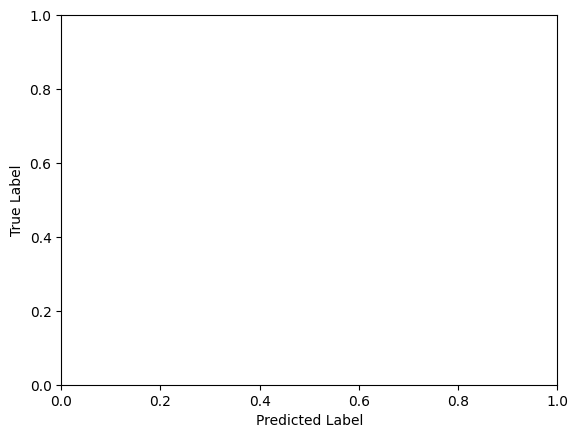


Classification Report:


NameError: name 'y_true' is not defined

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import shap
import cv2
import os# Save the trained model
# Load the model

model = load_model(model)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=categories))

# Implement Grad-CAM visualization
def get_gradcam(model, img_array, layer_name, pred_index=None):
    """
    Generate Grad-CAM visualization
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.maximum(tf.reduce_max(heatmap), 1e-10)
    return heatmap.numpy()

# Function to load and preprocess a single image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

# Function to display Grad-CAM for a single image
def display_gradcam(image_path, model, last_conv_layer, category_index=None):
    img_array = load_and_preprocess_image(image_path)
    heatmap = get_gradcam(model, img_array, last_conv_layer, category_index)
    
    # Load original image
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    
    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = cv2.addWeighted(img.astype('uint8'), 0.6, heatmap, 0.4, 0)
    
    # Display original and Grad-CAM
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img / 255)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img / 255)
    plt.title('Grad-CAM Visualization')
    plt.axis('off')
    plt.show()

# Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Example usage of Grad-CAM (you'll need to specify an image path)
# Uncomment and modify path to use:

# Find the last convolutional layer
last_conv_layer = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

# Example: visualize Grad-CAM for a specific image
image_path = "path_to_your_test_image.jpg"  # Replace with actual image path
display_gradcam(image_path, model, last_conv_layer)
